In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
import numpy as np

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [6]:
df.isnull().sum().sum()

0

# EDA

In [7]:
data=df.copy()

In [8]:
plt.style.use('seaborn')

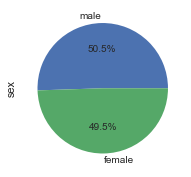

In [9]:
plt.figure(figsize=(5,3))
data.sex.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<Figure size 360x216 with 0 Axes>

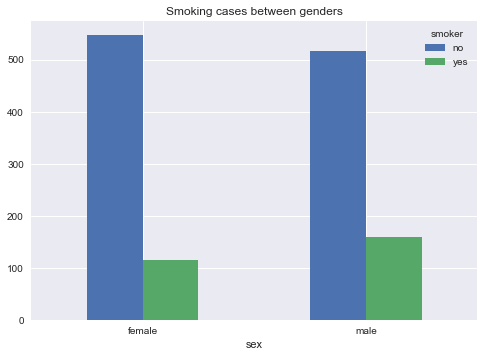

In [10]:
plt.figure(figsize=(5, 3))
df.groupby('smoker').sex.value_counts().unstack(0).plot.bar()
plt.title('Smoking cases between genders')
plt.xticks(rotation=0)
plt.show()

<Figure size 432x288 with 0 Axes>

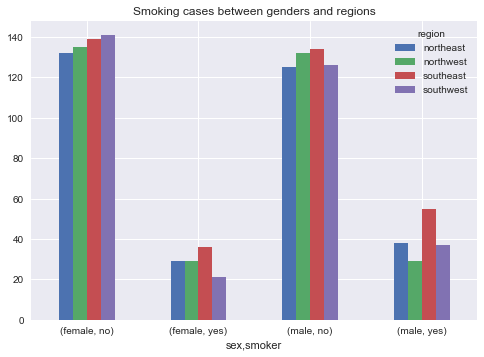

In [11]:
plt.figure(figsize=(6, 4))
data.groupby(['region', 'sex']).smoker.value_counts().unstack(0).plot.bar()
plt.title('Smoking cases between genders and regions')
plt.xticks(rotation=0)
plt.show()

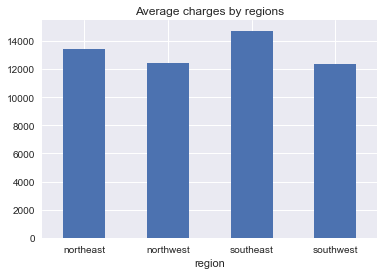

In [12]:
plt.figure(figsize=(6, 4))
data.groupby('region').charges.mean().plot.bar()
plt.title('Average charges by regions')
plt.xticks(rotation=0)
plt.show()

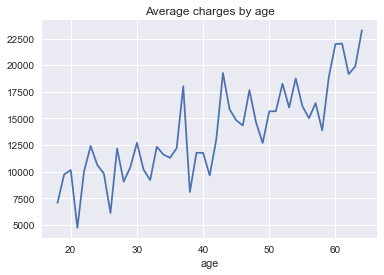

In [13]:
plt.figure(figsize=(6, 4))
data.groupby('age').charges.mean().plot()
plt.title('Average charges by age')
plt.show()

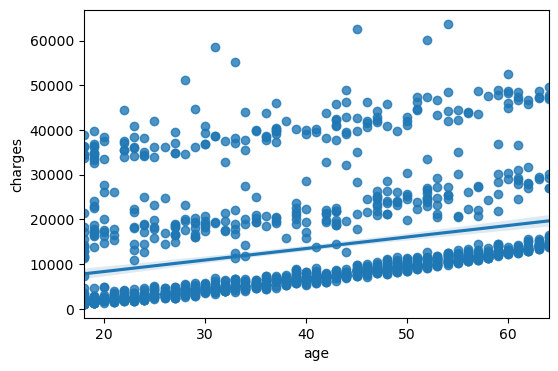

In [32]:
plt.figure(figsize=(6,4))
sns.regplot(data['age'], data['charges'])
plt.show()

# Feature Engineering

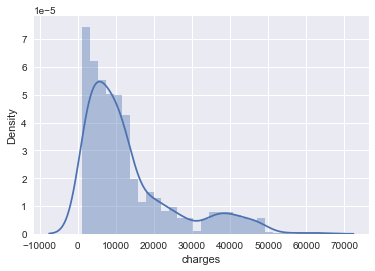

In [14]:
plt.figure(figsize=(6,4))
sns.distplot(data.charges)
plt.show()

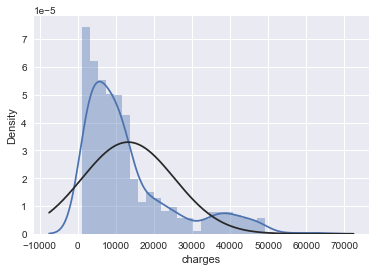

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(data.charges, fit=stats.norm)
plt.show()

# Outlier Analysis

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


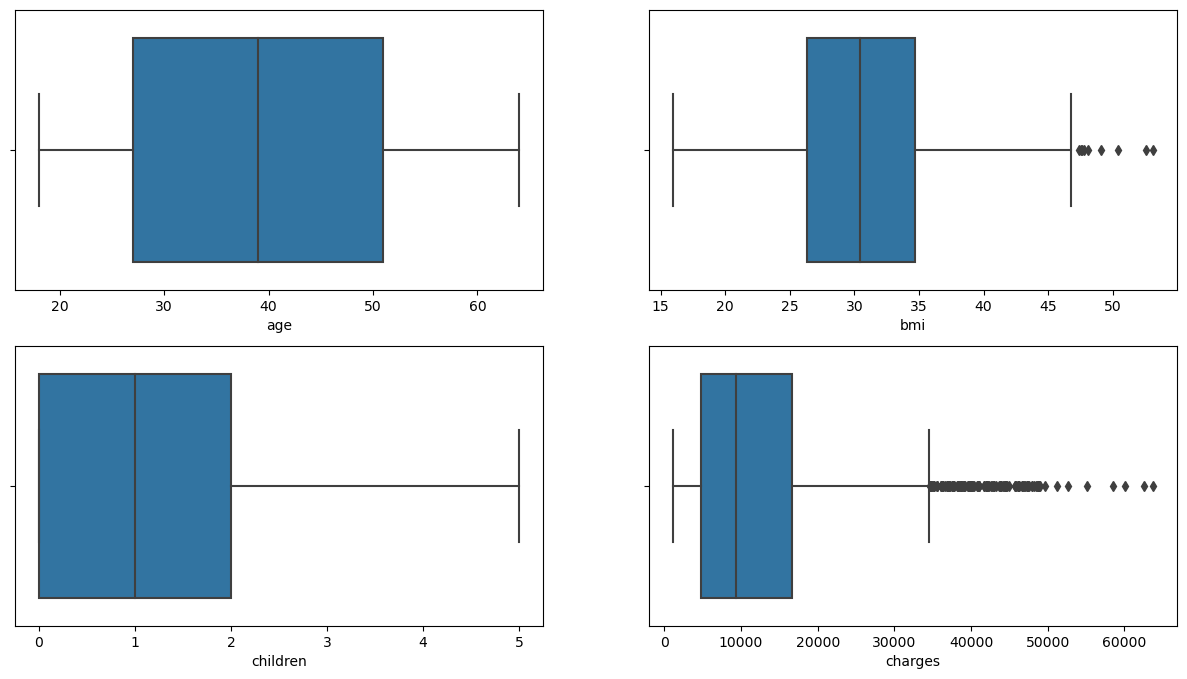

In [17]:
plt.style.use('default')
fig, ax=plt.subplots(2,2, figsize=(15, 8))
i, j=0, 0
for column in df._get_numeric_data().columns:
    sns.boxplot(df[column], ax=ax[i][j])
    j+=1
    if j==2:
        i+=1
        j=0

In [18]:
df.shape

(1338, 7)

In [19]:
df=df.query("`bmi`<45")

In [20]:
df=df.query("`charges`<50000")

In [21]:
df.shape

(1312, 7)

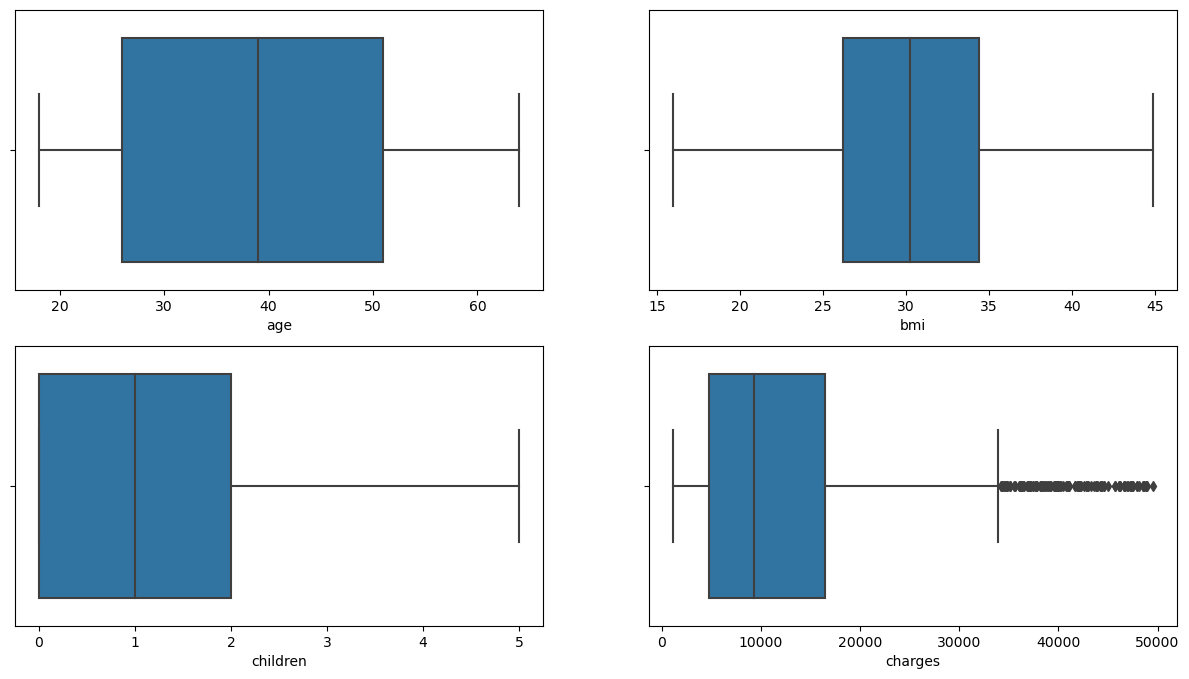

In [22]:
plt.style.use('default')
fig, ax=plt.subplots(2,2, figsize=(15, 8))
i, j=0, 0
for column in df._get_numeric_data().columns:
    sns.boxplot(df[column], ax=ax[i][j])
    j+=1
    if j==2:
        i+=1
        j=0

# Encoding

In [23]:
df=pd.get_dummies(df, drop_first=True)

In [35]:
Y=df.charges
X=df.drop(['charges'], axis=1)
print(Y.shape, X.shape)

(1312,) (1312, 8)


# Model 

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [57]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.25, random_state=42)

In [115]:
results={'model': [], 'r2_score': [], 'Rmse': []}

In [59]:
models=[LinearRegression(), Lasso(), Ridge(), ElasticNet(), KNeighborsRegressor(), 
        DecisionTreeRegressor(), LGBMRegressor()]

In [116]:
for model in models:
    m=model
    m.fit(X_train, Y_train)
    Y_test_pred=m.predict(X_test)
    rmse=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    r2=r2_score(Y_test, Y_test_pred)
    results['model'].append(type(model).__name__)
    results['r2_score'].append(r2)
    results['Rmse'].append(rmse)

In [117]:
results_frame=pd.DataFrame(results)
results_frame.sort_values('r2_score', ascending=False)

,model,r2_score,Rmse
6,LGBMRegressor,0.842569,4459.199242
0,LinearRegression,0.771401,5373.397981
1,Lasso,0.771395,5373.464578
2,Ridge,0.771187,5375.910025
5,DecisionTreeRegressor,0.689074,6266.710443
3,ElasticNet,0.403557,8679.523712
4,KNeighborsRegressor,0.185649,10141.849285


# Model Tuning

In [92]:
ridge_params={'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1], 
                   'solver': ['auto', 'svd', 'cholesky']}
lasso_params={'alpha': [0.1, 0.01, 0.005, 0.05, 0.001 ,0.2, 0.3, 0.5, 0.8, 0.9, 1]
                   }
lgbm_params={'learning_rate': [0.1, 0.2], 'max_depth': list(range(-1, 2, 1)), 
                   'n_estimators': list(range(97, 103))}

In [71]:
def tuning(x, y, model, model_params):
    results=[]
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    clf=GridSearchCV(model, model_params, cv=5, return_train_score=True)
    clf.fit(X_train, Y_train)
    Y_test_pred=clf.predict(X_test)
    test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    r2score=r2_score(Y_test, Y_test_pred)                                                  
    print(type(model).__name__)
    print('Rmse: {}'.format(test_error))
    print('r2_score: {}'.format(r2score))
    results.append({'model': type(model).__name__, 
                    'RMSE': test_error,
                    'R2 Score': r2score,
                    'best_score': clf.best_score_,
                    'best_params': clf.best_params_})
    return results

In [93]:
result1=tuning(X, Y, Ridge(), ridge_params)

Ridge
Rmse: 5373.400228785055
r2_score: 0.7714003681358432


In [94]:
result2=tuning(X, Y, Lasso(), lasso_params)

Lasso
Rmse: 5373.4505764908
r2_score: 0.7713960842483868


In [95]:
result3=tuning(X, Y, LGBMRegressor(silent=True), lgbm_params)

LGBMRegressor
Rmse: 4450.77355599518
r2_score: 0.8431631374614171


In [104]:
res1 = pd.DataFrame(result1)
res2 = pd.DataFrame(result2)
res3 = pd.DataFrame(result3)

In [111]:
res=pd.concat([res1, res2, res3])

In [128]:
sorted_results=res.sort_values('R2 Score', ascending=False)
sorted_results

,model,RMSE,R2 Score,best_score,best_params
0,LGBMRegressor,4450.773556,0.843163,0.836085,"{'learning_rate': 0.1, 'max_depth': -1, 'n_est..."
0,Ridge,5373.400229,0.771400,0.742205,"{'alpha': 0.001, 'solver': 'auto'}"
0,Lasso,5373.450576,0.771396,0.742206,{'alpha': 0.8}


# Final Model

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
lg=LGBMRegressor(**sorted_results.iloc[0, 4])
lg.fit(X_train, Y_train)
Y_test_pred=lg.predict(X_test)
test_error=np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2score=r2_score(Y_test, Y_test_pred)                                                  
print(type(model).__name__)
print('r2_score: {}%'.format(np.round(r2score, 3)*100))
print('Rmse: {}'.format(test_error))

LGBMRegressor
r2_score: 84.3%
Rmse: 4450.77355599518
